In [105]:
import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

In [106]:
import matplotlib.pyplot as plt
from numpy import linalg as LA
import scipy.special

import time
from scipy.integrate import odeint
from scipy.special import zeta
from random import choices

from numpy import sin, cos, power


In [107]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np

from scipy.optimize import minimize
#from qutip import *
#from qutip.piqs import *

import matplotlib.animation as animation
from IPython.display import HTML
from IPython.core.display import Image, display

In [108]:
"""Our system of differential equations belongs to the complex space, that is why we implemented the code suggested in"""
"""https://stackoverflow.com/questions/19910189/scipy-odeint-with-complex-initial-values."""

import time
import numpy as np
from scipy.integrate import odeint
from scipy.special import zeta
from random import choices

def odeintz(func, z0, t, **kwargs):
   
    
    """An odeint-like function for complex valued differential equations.

    Inputs:
    ----------
      -func: function associated to dr/dt=f(x;t), where x is the set of parameters and variables to be determined
      -z0: 1d array with length N*(5N-1)/2
      -t: 1d array from t=0 to t=tf (parameter set by the user)
      - **kwargs: keyword arguments related with external functions to be used in odeint
    
    Return:
      -z: multivariable array with the solution of the differential equation associated with each variable"""

    # Disallow Jacobian-related arguments.
    _unsupported_odeint_args = ['Dfun', 'col_deriv', 'ml', 'mu']
    bad_args = [arg for arg in kwargs if arg in _unsupported_odeint_args]
    if len(bad_args) > 0:
        raise ValueError("The odeint argument %r is not supported by "
                         "odeintz." % (bad_args[0],))

    # Make sure z0 is a numpy array of type np.complex128.
    z0 = np.array(z0, dtype=np.complex128, ndmin=1)

    def realfunc(x, t, *args):
        z = x.view(np.complex128)
        dzdt = func(z, t, *args)
        # func might return a python list, so convert its return
        # value to an array with type np.complex128, and then return
        # a np.float64 view of that array.
        return np.asarray(dzdt, dtype=np.complex128).view(np.float64)

    result = odeint(realfunc, z0.view(np.float64), t, **kwargs)

    if kwargs.get('full_output', False):
        z = result[0].view(np.complex128)
        infodict = result[1]
        return z, infodict
    else:
        z = result.view(np.complex128)
        return z

## Time-evolution of Weyl-symbols

\begin{align}
\partial_{t}F_{10}^{x} & =-g_{{\rm R}}\left(\alpha_{{\rm R},y}F_{31}^{x}+\alpha_{{\rm R},x}F_{31}^{y}\right)-\frac{\Omega_{{\rm R}}}{2}F_{31}^{y}-g_{{\rm L}}\left(\alpha_{{\rm L},y}F_{20}^{x}+\alpha_{{\rm L},x}F_{20}^{y}\right)-\frac{\Omega_{{\rm R}}}{2}F_{20}^{y},\\
\partial_{t}F_{20}^{x} & =-g_{{\rm R}}\left(\alpha_{{\rm R},y}F_{32}^{x}+\alpha_{{\rm R},x}F_{32}^{y}\right)-\frac{\Omega_{{\rm R}}}{2}F_{32}^{y}+g_{{\rm L}}\left(\alpha_{{\rm L},y}F_{10}^{x}-\alpha_{{\rm L},x}F_{10}^{y}\right)-\frac{\Omega_{{\rm L}}}{2}F_{10}^{y},\\
\partial_{t}F_{30}^{x} & =-\sqrt{2}g_{{\rm R}}\alpha_{{\rm R},y}\left(1-F_{2}-F_{1}-2F_{0}\right),\\
\partial_{t}F_{21}^{x} & =-\sqrt{2}g_{{\rm L}}\alpha_{{\rm L},y}\left(F_{2}-F_{1}\right),\\
\partial_{t}F_{31}^{x} & =g_{{\rm R}}\left(\alpha_{{\rm R},y}F_{10}^{x}+\alpha_{{\rm R},x}F_{10}^{y}\right)+\frac{\Omega_{{\rm R}}}{2}F_{10.i}^{y}-g_{{\rm L}}\left(\alpha_{{\rm L},y}F_{32}^{x}-\alpha_{{\rm L},x}F_{32}^{y}\right)+\frac{\Omega_{{\rm L}}}{2}F_{32}^{y},\\
\partial_{t}F_{32}^{x} & =g_{{\rm R}}\left(\alpha_{{\rm R},y}F_{20}^{x}+\alpha_{{\rm R},x}F_{20}^{y}\right)+\frac{\Omega_{{\rm R}}}{2}F_{20}^{y}+g_{{\rm L}}\left(\alpha_{{\rm L},y}F_{31}^{x}+\alpha_{{\rm L},x}F_{31}^{y}\right)+\frac{\Omega_{{\rm L}}}{2}F_{31}^{y},\\
\partial_{t}F_{10}^{y} & =-g_{{\rm R}}\left(\alpha_{{\rm R},x}F_{31}^{x}-\alpha_{{\rm R},y}F_{31}^{y}\right)-\frac{\Omega_{{\rm R}}}{2}F_{31}^{x}+g_{{\rm L}}\left(\alpha_{{\rm L},x}F_{20}^{x}-\alpha_{{\rm L},y}F_{20}^{y}\right)+\frac{\Omega_{{\rm L}}}{2}F_{20}^{x},\\
\partial_{t}F_{20}^{y} & =-g_{{\rm R}}\left(\alpha_{{\rm R},x}F_{32}^{x}-\alpha_{{\rm R},y}F_{32}^{y}\right)-\frac{\Omega_{{\rm R}}}{2}F_{32}^{x}+g_{{\rm L}}\left(\alpha_{{\rm L},x}F_{10}^{x}+\alpha_{{\rm L},y}F_{10}^{y}\right)+\frac{\Omega_{{\rm L}}}{2}F_{10}^{x},\\
\partial_{t}F_{30}^{y} & =-\left(2g_{{\rm R}}\alpha_{{\rm R},x}+\Omega_{{\rm R}}\right)\left(1-F_{2}-F_{1}-2F_{0}\right)/\sqrt{2},\\
\partial_{t}F_{21}^{y} & =-\left(2g_{{\rm L}}\alpha_{{\rm L},x}+\Omega_{{\rm L}}\right)\left(F_{2}-F_{1}\right)/\sqrt{2},\\
\partial_{t}F_{31}^{y} & =g_{{\rm R}}\left(\alpha_{{\rm R},x}F_{10}^{x}-\alpha_{{\rm R},y}F_{10}^{y}\right)+\frac{\Omega_{{\rm R}}}{2}F_{10}^{x}-g_{{\rm L}}\left(\alpha_{{\rm L},x}F_{32}^{x}+\alpha_{{\rm L},y}F_{32}^{y}\right)-\frac{\Omega_{{\rm L}}}{2}F_{32}^{x},\\
\partial_{t}F_{32}^{y} & =g_{{\rm R}}\left(\alpha_{{\rm R},x}F_{20}^{x}-\alpha_{{\rm R},y}F_{20}^{y}\right)+\frac{\Omega_{{\rm R}}}{2}F_{20}^{x}-g_{{\rm L}}\left(\alpha_{{\rm L},x}F_{31}^{x}-\alpha_{{\rm L},y}F_{31}^{y}\right)-\frac{\Omega_{{\rm L}}}{2}F_{31}^{x},\\
\partial_{t}F_{0} & =-\sqrt{2}\left(g_{{\rm R}}\left(\alpha_{{\rm R},y}F_{30}^{x}+\alpha_{{\rm R},x}F_{30}^{y}\right)+\frac{\Omega_{{\rm R}}}{2}F_{30}^{y}\right),\\
\partial_{t}F_{1} & =-\sqrt{2}\left(g_{{\rm L}}\left(\alpha_{{\rm L},y}F_{21}^{x}+\alpha_{{\rm L},x}F_{21}^{y}\right)+\frac{\Omega_{{\rm L}}}{2}F_{21}^{y}\right),\\
\partial_{t}F_{2} & =\sqrt{2}\left(g_{{\rm L}}\left(\alpha_{{\rm L},y}F_{21}^{x}+\alpha_{{\rm L},x}F_{21}^{y}\right)+\frac{\Omega_{{\rm L}}}{2}F_{21}^{y}\right),\\
\partial_{t}\alpha_{{\rm R},x} & =-\frac{g_{{\rm R}}}{\sqrt{2}}F_{30}^{y}-\Delta_{{\rm R}}\alpha_{{\rm R},y}-\frac{\kappa_{{\rm R}}}{2}\alpha_{{\rm R},x}+\sqrt{\frac{\kappa_{{\rm R}}}{4}}{\rm d}W_{1},\\
\partial_{t}\alpha_{{\rm R},y} & =-\frac{g_{{\rm R}}}{\sqrt{2}}F_{30}^{x}+\Delta_{{\rm R}}\alpha_{{\rm R},x}-\frac{\kappa_{{\rm R}}}{2}\alpha_{{\rm R},y}+\sqrt{\frac{\kappa_{R}}{4}}{\rm d}W_{2}.\\
\partial_{t}\alpha_{{\rm L},x} & =-\frac{g_{{\rm L}}}{\sqrt{2}}F_{21}^{y}-\Delta_{{\rm L}}\alpha_{{\rm L},y}-\frac{\kappa_{{\rm L}}}{2}\alpha_{{\rm L},x}+\sqrt{\frac{\kappa_{{\rm L}}}{4}}{\rm d}W_{3},\\
\partial_{t}\alpha_{{\rm L},y} & =-\frac{g_{{\rm L}}}{\sqrt{2}}F_{21}^{x}+\Delta_{{\rm L}}\alpha_{{\rm L},x}-\frac{\kappa_{{\rm L}}}{2}\alpha_{{\rm L},y}+\sqrt{\frac{\kappa_{{\rm L}}}{4}}{\rm d}W_{4}.
\end{align}

## Wigner discrete distribution for $\left|\psi_{i}\left(0\right)\right\rangle =\cos\left(\frac{\theta}{2}\right)\left|0\right\rangle +{\rm e}^{{\rm i}\phi}\sin\left(\frac{\theta}{2}\right)\left|1\right\rangle $


\begin{align}
\lambda_{10,x} & =\left(\mu_{10,x}=\frac{\cos\left(\phi\right)\sin\left(\theta\right)}{\sqrt{2}},\sigma_{10,x}^{2}=\frac{1-\left(\cos\left(\phi\right)\sin\left(\theta\right)\right)^{2}}{2}\right),\\
\lambda_{20,x} & =\left(\mu_{20,x}=0,\sigma_{20,x}^{2}=\frac{\cos^{2}\left(\frac{\theta}{2}\right)}{2}\right),\\
\lambda_{30,x} & =\left(\mu_{30,x}=0,\sigma_{30,x}^{2}=\frac{\cos^{2}\left(\frac{\theta}{2}\right)}{2}\right),\\
\lambda_{21,x} & =\left(\mu_{21,x}=0,\sigma_{21,x}^{2}=\frac{\sin^{2}\left(\frac{\theta}{2}\right)}{2}\right),\\
\lambda_{31,x} & =\left(\mu_{31,x}=0,\sigma_{31,x}^{2}=\frac{\sin^{2}\left(\frac{\theta}{2}\right)}{2}\right),\\
\lambda_{32,x} & =\left(\mu_{32,x}=0,\sigma_{32,x}^{2}=0\right)=0,\\
\lambda_{10,y} & =\left(\mu_{10,y}=\frac{\sin\left(\phi\right)\sin\left(\theta\right)}{\sqrt{2}},\sigma_{31,x}^{2}=\frac{1-\left(\sin\left(\phi\right)\sin\left(\theta\right)\right)^{2}}{2}\right),\\
\lambda_{20,y} & =\left(\mu_{20,y}=0,\sigma_{20,y}^{2}=\frac{\cos^{2}\left(\frac{\theta}{2}\right)}{2}\right),\\
\lambda_{30,y} & =\left(\mu_{30,y}=0,\sigma_{30,y}^{2}=\frac{\cos^{2}\left(\frac{\theta}{2}\right)}{2}\right),\\
\lambda_{21,y} & =\left(\mu_{21,y}=0,\sigma_{21,y}^{2}=\frac{\sin^{2}\left(\frac{\theta}{2}\right)}{2}\right),\\
\lambda_{31,y} & =\left(\mu_{31,y}=0,\sigma_{31,y}^{2}=\frac{\sin^{2}\left(\frac{\theta}{2}\right)}{2}\right),\\
\lambda_{32,y} & =\left(\mu_{32,y}=0,\sigma_{32,y}^{2}=0\right)=0,\\
\lambda_{0,z} & =\left(\mu_{0,z}=\cos^{2}\left(\frac{\theta}{2}\right),\sigma_{0,z}^{2}=\sin^{2}\left(\frac{\theta}{2}\right)\cos^{2}\left(\frac{\theta}{2}\right)\right),\\
\lambda_{1,z} & =\left(\mu_{1,z}=\sin^{2}\left(\frac{\theta}{2}\right),\sigma_{1,z}^{2}=\sin^{2}\left(\frac{\theta}{2}\right)\cos^{2}\left(\frac{\theta}{2}\right)\right),\\
\lambda_{2,z} & =\left(\mu_{2,z}=0,\sigma_{2,z}^{2}=0\right)=0.
\end{align}

In [109]:
import numpy as np
from numpy import sqrt


import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

## TWA

In [110]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import random, zeros, sqrt,cos,sin



matrix_array=[]

# X matrix


f10x=np.zeros((4, 4),dtype=np.complex_)
f10x[0][1]=(1/sqrt(2))
f10x=f10x+np.transpose(f10x)
matrix_array.append(f10x)

f20x=np.zeros((4, 4),dtype=np.complex_)
f20x[2][0]=(1/sqrt(2))
f20x=f20x+np.transpose(f20x)
matrix_array.append(f20x)

f30x=np.zeros((4, 4),dtype=np.complex_)
f30x[3][0]=(1/sqrt(2))
f30x=f30x+np.transpose(f30x)
matrix_array.append(f30x)

f21x=np.zeros((4, 4),dtype=np.complex_)
f21x[2][1]=(1/sqrt(2))
f21x=f21x+np.transpose(f21x)
matrix_array.append(f21x)

f31x=np.zeros((4, 4),dtype=np.complex_)
f31x[3][1]=(1/sqrt(2))
f31x=f31x+np.transpose(f31x)
matrix_array.append(f31x)

f32x=np.zeros((4, 4),dtype=np.complex_)
f32x[3][2]=(1/sqrt(2))
f32x=f32x+np.transpose(f32x)
matrix_array.append(f32x)

#Y Matrix

f10y=np.zeros((4, 4),dtype=np.complex_)
f10y[0][1]=-1j*(1/sqrt(2))
f10y=f10y+np.conjugate(np.transpose(f10y))
matrix_array.append(f10y)


f20y=np.zeros((4, 4),dtype=np.complex_)
f20y[0][2]=-1j*(1/sqrt(2))
f20y=f20y+np.conjugate(np.transpose(f20y))
matrix_array.append(f20y)


f30y=np.zeros((4, 4),dtype=np.complex_)
f30y[0][3]=-1j*(1/sqrt(2))
f30y=f30y+np.conjugate(np.transpose(f30y))
matrix_array.append(f30y)


f21y=np.zeros((4, 4),dtype=np.complex_)
f21y[1][2]=-1j*(1/sqrt(2))
f21y=f21y+np.conjugate(np.transpose(f21y))
matrix_array.append(f21y)

f31y=np.zeros((4, 4),dtype=np.complex_)
f31y[1][3]=-1j*(1/sqrt(2))
f31y=f31y+np.conjugate(np.transpose(f31y))
matrix_array.append(f31y)

f32y=np.zeros((4, 4),dtype=np.complex_)
f32y[2][3]=-1j*(1/sqrt(2))
f32y=f32y+np.conjugate(np.transpose(f32y))
matrix_array.append(f32y)


#Z matrix

f0z=np.zeros((4, 4),dtype=np.complex_)
f0z[0][0]=1
matrix_array.append(f0z)


f1z=np.zeros((4, 4),dtype=np.complex_)
f1z[1][1]=1
matrix_array.append(f1z)


f2z=np.zeros((4, 4),dtype=np.complex_)
f2z[2][2]=1
matrix_array.append(f2z)



from numba import jit

dt = 0.0001# Time step.
T = 50 # Total time.
n = int(T / dt) # Number of time steps.
steps=int(T/dt)

times = np.linspace(0., T, n)


N=15

gR=1
DeltaR=0
KapR= 20
OmegaR= 0.5*N/(KapR)


gL=1
DeltaL=0
KapL=20
OmegaL= 0.5* N/(KapL+1e-10) 


Gamma_du=0  #Fixed


sqrt_N=np.sqrt(N)



#set the initial values due to the measurements in the state |\psi>=cos(\theta/2)|0>+sin(\theta/2)|1>


Theta = 0
Phi   = 0

#-----------------------------------------------------------------------------------------------------

Psi_0=np.zeros((4,1),dtype=np.complex_)
Psi_0[0][0]=np.cos(Theta/2)
Psi_0[1][0]=np.sin(Theta/2)*np.exp(1j*Phi)


Psi_0_adj=np.transpose(np.conjugate(Psi_0))

#--------------------------------

#Averages Vector

Miu=[]

for j in matrix_array:
    Miu.append(np.matmul(Psi_0_adj,np.matmul(j,Psi_0))[0][0])

    

Cov_mat=np.zeros((15, 15),dtype=np.complex_)

for i in range(15):
    for j in range(15):
        Cov_mat[i][j]=0.5*(np.matmul(Psi_0_adj,np.matmul( np.matmul(matrix_array[i],matrix_array[j])+np.matmul(matrix_array[j],matrix_array[i]),Psi_0))[0][0])-Miu[i]*Miu[j]        
        

Cov_mat_list=[]

for j in range(15):
    Cov_mat_list.append(list(np.real(Cov_mat[j])))    
    

from scipy import stats


@jit

def trayectory(N,Stochastic):
    sqrtdt = np.sqrt(dt)*Stochastic
    
    Results =zeros((19, n))
    
    Results[15][0] = np.random.normal(0, 0.5)
    Results[16][0] = np.random.normal(0, 0.5)
    Results[17][0] = np.random.normal(0, 0.5)
    Results[18][0] = np.random.normal(0, 0.5)
    
    
    Sum_TWA=np.zeros((15,1))

    for j in range(N):
        Sum_TWA=Sum_TWA+np.random.multivariate_normal(np.real(Miu), Cov_mat_list, 1).T
    
    Rand=Sum_TWA
    
    
    Results[0][0] =Rand[0][0]  #x10  
    Results[1][0] =Rand[1][0]  #x20
    Results[2][0] =Rand[2][0]  #x30
    Results[3][0] =Rand[3][0]  #x21
    Results[4][0] =Rand[4][0]  #x31
    Results[5][0] =Rand[5][0]  #x32
        
    Results[6][0] =Rand[6][0]  #y10
    Results[7][0] =Rand[7][0] #y20
    Results[8][0] =Rand[8][0]  #y30
    Results[9][0] =Rand[9][0]  #y21
    Results[10][0]=Rand[10][0]  #y31
    Results[11][0]=Rand[11][0]  #y32
        
    Results[12][0]=Rand[12][0]  #z0
    Results[13][0]=Rand[13][0]  #z2
    Results[14][0]=Rand[14][0]  #z3
    
    
    for t in range(n-1):
        
        Normal_VA_1=random.randn() #np.random.normal(0, 1)
        Normal_VA_2=random.randn() #np.random.normal(0, 1)
        Normal_VA_3=random.randn() #np.random.normal(0, 1)
        Normal_VA_4=random.randn() #np.random.normal(0, 1)
        
        
        alpRx=Results[15][t]
        alpRy=Results[16][t]
        alpLx=Results[17][t]
        alpLy=Results[18][t]
            
        s10x=Results[0][t]   #x10
        s20x=Results[1][t]   #x20
        s30x=Results[2][t]   #x30  
        s21x=Results[3][t]   #x21 
        s31x=Results[4][t]   #x31
        s32x=Results[5][t]   #x32
            
        s10y=Results[6][t]   #y10
        s20y=Results[7][t]   #y20
        s30y=Results[8][t]   #y30
        s21y=Results[9][t]   #y21
        s31y=Results[10][t]  #y31
        s32y=Results[11][t]  #y32
            
        s0z=Results[12][t]   #z0
        s1z=Results[13][t]   #z1
        s2z=Results[14][t]   #z2
            
        # alpRx=Results[15*N][t]
        # alpRy=Results[15*N+1][t]
        # alpLx=Results[15*N+2][t]
        # alpLy=Results[15*N+3][t]
        
        
        Results[15][t+1] = alpRx-dt*DeltaR*alpRy-dt*(KapR/2)*alpRx+np.sqrt(KapR/4)*sqrtdt * Normal_VA_1 +(gR/sqrt(2))*dt*s30y
            
        Results[16][t+1] = alpRy+dt*DeltaR*alpRx-dt*(KapR/2)*alpRy+np.sqrt(KapR/4)*sqrtdt * Normal_VA_2 -(gR/sqrt(2))*dt*s30x
             
        Results[17][t+1] = alpLx -dt*DeltaL*alpLy-dt*(KapL/2)*alpLx+np.sqrt(KapL/4)*sqrtdt * Normal_VA_3 +(gL/sqrt(2))*dt*s21y 
        
        Results[18][t+1] = alpLy +dt*DeltaL*alpLx-dt*(KapL/2)*alpLy+np.sqrt(KapL/4)*sqrtdt * Normal_VA_4 -(gL/sqrt(2))*dt*s21x 
         
      
        
        Results[0][t+1] = s10x  +dt*(-gR)*(-alpRx*s31y+alpRy*s31x) +dt*(OmegaR/2)*s31y-\
            dt*gL*(-alpLx*s20y+alpLy*s20x)+dt*(OmegaL/2)*s20y
            
        Results[1][t+1] = s20x  +dt*(-gR)*(-alpRx*s32y+alpRy*s32x) +dt*(OmegaR/2)*s32y+\
            dt*gL*(alpLx*s10y+alpLy*s10x)+dt*(OmegaL/2)*s10y
            
        Results[2][t+1] = s30x  +dt*(-sqrt(2)*gR)*alpRy*(N-s2z-s1z-2*s0z)
            
        Results[3][t+1] = s21x  +dt*(-sqrt(2)*gL)*alpLy*(s2z-s1z)
            
        Results[4][t+1] = s31x  +dt*gR*(alpRy*s10x-alpRx*s10y)+dt*(-OmegaR/2)*s10y-\
            dt*gL*(alpLx*s32y+alpLy*s32x)+dt*(-OmegaL/2)*s32y    
            
        Results[5][t+1] = s32x  +dt*gR*(-alpRx*s20y+alpRy*s20x)+dt*(-OmegaR/2)*s20y+\
            dt*gL*(-alpLx*s31y+alpLy*s31x)+dt*(-OmegaL/2)*s31y
        
        Results[6][t+1] = s10y  +dt*(gR)*(alpRx*s31x+alpRy*s31y)+dt*(OmegaR/2)*s31x-\
            dt*gL*(alpLx*s20x+alpLy*s20y)-dt*(OmegaL/2)*s20x
        
        Results[7][t+1] = s20y  +dt*(gR)*(alpRx*s32x+alpRy*s32y)+dt*(OmegaR/2)*s32x-\
            dt*gL*(alpLx*s10x-alpLy*s10y)+dt*(-OmegaL/2)*s10x

        Results[8][t+1] = s30y  +dt*(2*gR*alpRx+OmegaR)*( N-s2z-s1z-2*s0z  )/sqrt(2)
                
        Results[9][t+1] = s21y  +dt*(2*gL*alpLx+OmegaL)*(s2z-s1z)/sqrt(2)
        
        Results[10][t+1] = s31y - dt*gR*(alpRx*s10x+alpRy*s10y)-dt*(OmegaR/2)*s10x+\
            dt*gL*(alpLx*s32x-alpLy*s32y)+dt*(OmegaL/2)*s32x
            
        Results[11][t+1] = s32y + dt*(-gR)*(alpRx*s20x+alpRy*s20y)-dt*(OmegaR/2)*s20x+\
            dt*gL*(alpLx*s31x+alpLy*s31y)+dt*(OmegaL/2)*s31x
        
        Results[12][t+1] = s0z+ dt*(sqrt(2))*(gR*(alpRx*s30y-alpRy*s30x)+ (OmegaR/2)*s30y )
        
        Results[13][t+1] = s1z+ dt*(sqrt(2))*(gL*(alpLx*s21y-alpLy*s21x)+ (OmegaL/2)*s21y )
            
        Results[14][t+1] = s2z+ dt*(-sqrt(2))*(gL*(-alpLy*s21x+alpLx*s21y)+ (OmegaL/2)*s21y )
            

            
    return Results


In [111]:
from numpy import add
from numba import jit



itera=5000
@jit

def averages(Stochastic,itera=itera,N=N,n=n):
    Results =zeros((19, n))
    for j in range(itera):
        Trayec=trayectory(N,Stochastic)
        Results=add(Results,Trayec)
    
    return Results/itera
    
    
    
    

In [ ]:
t0=time.time()

itera=60

Result_varDDTWA_Col = averages(1,itera=itera,N=N,n=n)
#Result_varDTWA_Col  = averages(0,itera=itera,N=N,n=n)



t1=time.time()

print(t1-t0)

## Mean-Field

In [ ]:
theta=Theta
phi=Phi


mux10, sigmax10 = (N)*cos(phi)*sin(theta)/sqrt(2),sqrt(N)* (   (1- (cos(phi)*sin(theta))**2 )/2  )**0.5 # mean and standard deviation
mux20, sigmax20 = 0                                ,sqrt(N)*(((cos(theta/2))**2)/2) # mean and standard deviation
mux30, sigmax30 = 0                                ,sqrt(N)*(((cos(theta/2))**2)/2) # mean and standard deviation
mux21, sigmax21 = 0                                ,sqrt(N)*(((sin(theta/2))**2)/2) # mean and standard deviation
mux31, sigmax31 = 0                                ,sqrt(N)*(((sin(theta/2))**2)/2) # mean and standard deviation
mux32, sigmax32 = 0                                ,0                                 # mean and standard deviation

muy10, sigmay10 = (N)*sin(phi)*sin(theta)/sqrt(2),sqrt(N)* (   (1- (sin(phi)*sin(theta))**2 )/2  )**0.5 # mean and standard deviation
muy20, sigmay20 = 0                                ,sqrt(N)*(((cos(theta/2))**2)/2) # mean and standard deviation
muy30, sigmay30 = 0                                ,sqrt(N)*(((cos(theta/2))**2)/2) # mean and standard deviation
muy21, sigmay21 = 0                                ,sqrt(N)*(((sin(theta/2))**2)/2) # mean and standard deviation
muy31, sigmay31 = 0                                ,sqrt(N)*(((sin(theta/2))**2)/2) # mean and standard deviation
muy32, sigmay32 = 0                                ,0                                 # mean and standard deviation

muz0, sigmaz0 = (N)*(cos(theta/2))**2, sqrt(N)*((sin(theta/2))**2)*((cos(theta/2))**2)  # mean and standard deviation
muz1, sigmaz1 = (N)*(sin(theta/2))**2, sqrt(N)*((sin(theta/2))**2)*((cos(theta/2))**2)  # mean and standard deviation
muz2, sigmaz2 = 0                      , 0           # mean and standard deviation


@jit

def trayectory_meanfield(N,Stochastic):
    sqrtdt = np.sqrt(dt)*Stochastic
    
    Results =zeros((19, n))
    
    Results[15][0] = 0
    Results[16][0] = 0
    Results[17][0] = 0
    Results[18][0] = 0
    
    
    Results[0][0] =mux10  #x10  
    Results[1][0] =mux20  #x20
    Results[2][0] =mux30  #x30
    Results[3][0] =mux21  #x21
    Results[4][0] =mux31  #x31
    Results[5][0] =mux32  #x32
        
    Results[6][0] =muy10  #y10
    Results[7][0] =muy20  #y20
    Results[8][0] =muy30  #y30
    Results[9][0] =muy21  #y21
    Results[10][0]=muy31  #y31
    Results[11][0]=muy32  #y32
        
    Results[12][0]=muz0  #z0
    Results[13][0]=muz1  #z1
    Results[14][0]=muz2  #z2
    
    
    for t in range(n-1):
        
        Normal_VA_1=random.randn() #np.random.normal(0, 1)
        Normal_VA_2=random.randn() #np.random.normal(0, 1)
        Normal_VA_3=random.randn() #np.random.normal(0, 1)
        Normal_VA_4=random.randn() #np.random.normal(0, 1)
        
        
        alpRx=Results[15][t]
        alpRy=Results[16][t]
        alpLx=Results[17][t]
        alpLy=Results[18][t]
            
        s10x=Results[0][t]   #x10
        s20x=Results[1][t]   #x20
        s30x=Results[2][t]   #x30  
        s21x=Results[3][t]   #x21 
        s31x=Results[4][t]   #x31
        s32x=Results[5][t]   #x32
            
        s10y=Results[6][t]   #y10
        s20y=Results[7][t]   #y20
        s30y=Results[8][t]   #y30
        s21y=Results[9][t]   #y21
        s31y=Results[10][t]  #y31
        s32y=Results[11][t]  #y32
            
        s0z=Results[12][t]   #z0
        s1z=Results[13][t]   #z1
        s2z=Results[14][t]   #z2
            
        # alpRx=Results[15*N][t]
        # alpRy=Results[15*N+1][t]
        # alpLx=Results[15*N+2][t]
        # alpLy=Results[15*N+3][t]
        
        
        Results[15][t+1] = alpRx-dt*DeltaR*alpRy-dt*(KapR/2)*alpRx+np.sqrt(KapR/4)*sqrtdt * Normal_VA_1 +(gR/sqrt(2))*dt*s30y
            
        Results[16][t+1] = alpRy+dt*DeltaR*alpRx-dt*(KapR/2)*alpRy+np.sqrt(KapR/4)*sqrtdt * Normal_VA_2 -(gR/sqrt(2))*dt*s30x
             
        Results[17][t+1] = alpLx -dt*DeltaL*alpLy-dt*(KapL/2)*alpLx+np.sqrt(KapL/4)*sqrtdt * Normal_VA_3 +(gL/sqrt(2))*dt*s21y 
        
        Results[18][t+1] = alpLy +dt*DeltaL*alpLx-dt*(KapL/2)*alpLy+np.sqrt(KapL/4)*sqrtdt * Normal_VA_4 -(gL/sqrt(2))*dt*s21x 
         
      
        
        Results[0][t+1] = s10x  +dt*(-gR)*(-alpRx*s31y+alpRy*s31x) +dt*(OmegaR/2)*s31y-\
            dt*gL*(-alpLx*s20y+alpLy*s20x)+dt*(OmegaL/2)*s20y
            
        Results[1][t+1] = s20x  +dt*(-gR)*(-alpRx*s32y+alpRy*s32x) +dt*(OmegaR/2)*s32y+\
            dt*gL*(alpLx*s10y+alpLy*s10x)+dt*(OmegaL/2)*s10y
            
        Results[2][t+1] = s30x  +dt*(-sqrt(2)*gR)*alpRy*(N-s2z-s1z-2*s0z)
            
        Results[3][t+1] = s21x  +dt*(-sqrt(2)*gL)*alpLy*(s2z-s1z)
            
        Results[4][t+1] = s31x  +dt*gR*(alpRy*s10x-alpRx*s10y)+dt*(-OmegaR/2)*s10y-\
            dt*gL*(alpLx*s32y+alpLy*s32x)+dt*(-OmegaL/2)*s32y    
            
        Results[5][t+1] = s32x  +dt*gR*(-alpRx*s20y+alpRy*s20x)+dt*(-OmegaR/2)*s20y+\
            dt*gL*(-alpLx*s31y+alpLy*s31x)+dt*(-OmegaL/2)*s31y
        
        Results[6][t+1] = s10y  +dt*(gR)*(alpRx*s31x+alpRy*s31y)+dt*(OmegaR/2)*s31x-\
            dt*gL*(alpLx*s20x+alpLy*s20y)-dt*(OmegaL/2)*s20x
        
        Results[7][t+1] = s20y  +dt*(gR)*(alpRx*s32x+alpRy*s32y)+dt*(OmegaR/2)*s32x-\
            dt*gL*(alpLx*s10x-alpLy*s10y)+dt*(-OmegaL/2)*s10x

        Results[8][t+1] = s30y  +dt*(2*gR*alpRx+OmegaR)*( N-s2z-s1z-2*s0z  )/sqrt(2)
                
        Results[9][t+1] = s21y  +dt*(2*gL*alpLx+OmegaL)*(s2z-s1z)/sqrt(2)
        
        Results[10][t+1] = s31y - dt*gR*(alpRx*s10x+alpRy*s10y)-dt*(OmegaR/2)*s10x+\
            dt*gL*(alpLx*s32x-alpLy*s32y)+dt*(OmegaL/2)*s32x
            
        Results[11][t+1] = s32y + dt*(-gR)*(alpRx*s20x+alpRy*s20y)-dt*(OmegaR/2)*s20x+\
            dt*gL*(alpLx*s31x+alpLy*s31y)+dt*(OmegaL/2)*s31x
        
        Results[12][t+1] = s0z+ dt*(sqrt(2))*(gR*(alpRx*s30y-alpRy*s30x)+ (OmegaR/2)*s30y )
        
        Results[13][t+1] = s1z+ dt*(sqrt(2))*(gL*(alpLx*s21y-alpLy*s21x)+ (OmegaL/2)*s21y )
            
        Results[14][t+1] = s2z+ dt*(-sqrt(2))*(gL*(-alpLy*s21x+alpLx*s21y)+ (OmegaL/2)*s21y )
            

            
    return Results

In [ ]:
Mean_field_res=trayectory_meanfield(N,0)

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

label_size = 20



index=13


plt.plot(times,Result_varDDTWA_Col[index])
plt.plot(times,Mean_field_res[index])


In [ ]:
plt.title("Gaussian Covariance")
plt.imshow(np.real(Cov_mat))
plt.colorbar()
plt.show()

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $<S_z>$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_Col[12]/2,"--",label="$S^z_{0}$ DisTWA Col")
#plt.plot(times, Result_varDTWA_Col[12]/2,"-",label="$S^z_{0}$ TWA Col")

plt.plot(times, Result_varDDTWA_Col[13]/2,"--",label="$S^z_{1}$ DisTWA Col")
#plt.plot(times, Result_varDTWA_Col[13]/2,"-",label="$S^z_{1}$ TWA Col")

plt.plot(times, Result_varDDTWA_Col[14]/2,"--",label="$S^z_{2}$ DisTWA Col")
#plt.plot(times, Result_varDTWA_Col[14]/2,"-",label="$S^z_{2}$ TWA Col")



plt.plot(times, Mean_field_res[12]/2,"-",label="$S^z_{0}$ Mean-Field")
plt.plot(times, Mean_field_res[13]/2,"-",label="$S^z_{1}$ Mean-Field")
plt.plot(times, Mean_field_res[14]/2,"-",label="$S^z_{2}$ Mean-Field")





plt.plot(times, 0*times,"-",label="$<S_k>=0$")

#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $<S_z>$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_Col[12]/N+Result_varDDTWA_Col[13]/N,"--",label="Population g DissTWA Col")
plt.plot(times, Mean_field_res[12]/N+Mean_field_res[13]/N,"-",label="Population g Mean-Field")
#plt.plot(times, Result_varDTWA_Col[12]/2,"-",label="$S^z_{0}$ TWA Col")




plt.plot(times, 0*times,"-",label="$<S_k>=0$")

#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

In [ ]:
Resu=Mean_field_res[12]/N+Mean_field_res[13]/N

In [ ]:
Resu[-1]

## DDTWA Dynamics Unitary Evolution

In [112]:
from numpy import sqrt
from numba import jit

In [130]:
#set the initial values due to the measurements in the state |\psi>=cos(\theta/2)|0>+sin(\theta/2)|1>

#We will start with the state |0>. 


N=15
#---------------------------------------------------------------

Theta = np.pi/2
Phi   = np.pi/2

#---------------------------------------------------------------


theta = Theta
phi   = Phi

#-----------------------------------------------------------------------------------------------------



from scipy import stats

mk = np.array([-1/sqrt(2),0,1/sqrt(2)])

mzk=np.array([0,1])


x10=( 0.5 , 0 , 0.5 )
x20=( 0.5 , 0 , 0.5 )
x30=( 0.5 , 0 , 0.5 )
x21=( 0   , 1 , 0   )
x31=( 0   , 1 , 0   )
x32=( 0   , 1 , 0   )

y10=( 0.5 , 0 , 0.5 )
y20=( 0.5 , 0 , 0.5 )
y30=( 0.5 , 0 , 0.5 )
y21=( 0   , 1 , 0   )
y31=( 0   , 1 , 0   )
y32=( 0   , 1 , 0   )

z0=( 0 , 1 )
z1=( 1 , 0)
z2=( 1,  0)


dt0 = 0.0001# Time step.
T0 = Theta/2 # Total time.
n0 = int(T0 / dt0) # Number of time steps.
steps0=int(T0/dt0)


times0=np.linspace(0,T0,n0)


@jit

def trayectory_RTheta(N,Stochastic):
    sqrtdt = np.sqrt(dt0)*Stochastic
    
    Results =zeros((15*N+4, n0))
    
    Results[15*N][0]   = np.random.normal(0, 0.5)
    Results[15*N+1][0] = np.random.normal(0, 0.5)
    Results[15*N+2][0] = np.random.normal(0, 0.5)
    Results[15*N+3][0] = np.random.normal(0, 0.5)
    
    
    for j in range(N):        
        
        Results[j][0]     =np.random.choice(mk,1,p=x10)[0]  #x10  
        Results[j+N][0]   =np.random.choice(mk,1,p=x20)[0]  #x20
        Results[j+2*N][0] =np.random.choice(mk,1,p=x30)[0]  #x30
        Results[j+3*N][0] =np.random.choice(mk,1,p=x21)[0]  #x21
        Results[j+4*N][0] =np.random.choice(mk,1,p=x31)[0]  #x31
        Results[j+5*N][0] =np.random.choice(mk,1,p=x32)[0]  #x32
        
        Results[j+6*N][0] =np.random.choice(mk,1,p=y10)[0]  #y10
        Results[j+7*N][0] =np.random.choice(mk,1,p=y20)[0]  #y20
        Results[j+8*N][0] =np.random.choice(mk,1,p=y30)[0]  #y30
        Results[j+9*N][0] =np.random.choice(mk,1,p=y21)[0]  #y21
        Results[j+10*N][0]=np.random.choice(mk,1,p=y31)[0]  #y31
        Results[j+11*N][0]=np.random.choice(mk,1,p=y32)[0]  #y32
        
        Results[j+12*N][0]=np.random.choice(mzk,1,p=z0)[0]  #z10
        Results[j+13*N][0]=np.random.choice(mzk,1,p=z1)[0]  #z21
        Results[j+14*N][0]=np.random.choice(mzk,1,p=z2)[0]  #z32
    
    for t in range(n0-1):
      
        
        alpRx=Results[15*N][t]
        alpRy=Results[15*N+1][t]
        alpLx=Results[15*N+2][t]
        alpLy=Results[15*N+3][t]
        
        
        
        Results[15*N][t+1]   = alpRx
            
        Results[15*N+1][t+1] = alpRy
             
        Results[15*N+2][t+1] = alpLx  
        
        Results[15*N+3][t+1] = alpLy  
                
                
        for i in range(N): 
            
                     
            s10x=Results[i][t]       #x10
            s20x=Results[i+N][t]     #x20
            s30x=Results[i+2*N][t]   #x30  
            s21x=Results[i+3*N][t]   #x21 
            s31x=Results[i+4*N][t]   #x31
            s32x=Results[i+5*N][t]   #x32
            
            s10y=Results[i+6*N][t]   #y10
            s20y=Results[i+7*N][t]   #y20
            s30y=Results[i+8*N][t]   #y30
            s21y=Results[i+9*N][t]   #y21
            s31y=Results[i+10*N][t]  #y31
            s32y=Results[i+11*N][t]  #y32
            
            s0z=Results[i+12*N][t]  #z0
            s1z=Results[i+13*N][t]  #z1
            s2z=Results[i+14*N][t]  #z2
            
            # alpRx=Results[15*N][t]
            # alpRy=Results[15*N+1][t]
            # alpLx=Results[15*N+2][t]
            # alpLy=Results[15*N+3][t]
            
            
            Results[i][t+1]     = s10x  +dt0*sqrt(2)*(s0z-s1z)
            
            Results[i+N][t+1]   = s20x  +dt0*(-s21x)
            
            Results[i+2*N][t+1] = s30x  +dt0*(-s31x)
            

            Results[i+3*N][t+1] = s21x  +dt0*(s20x)
            
            Results[i+4*N][t+1] = s31x  +dt0*(s30x)
            
            Results[i+5*N][t+1] = s32x  
            
            Results[i+6*N][t+1] = s10y 

            Results[i+7*N][t+1] = s20y   +dt0*(-s21y)




            
            Results[i+8*N][t+1] = s30y   +dt0*(-s31y)



            
            Results[i+9*N][t+1] = s21y  +dt0*(s20y)
            
            Results[i+10*N][t+1] = s31y + dt0*(s30y)


            
            Results[i+11*N][t+1] = s32y 
            
            Results[i+12*N][t+1] = s0z+ dt0*(-sqrt(2))*s10x
            
            Results[i+13*N][t+1] = s1z+ dt0*(sqrt(2))*s10x
            
            Results[i+14*N][t+1] = s2z
            
        
            
    return Results


In [131]:
from numpy import mean
from numpy import linalg
from numpy import zeros
from numba import jit
@jit

def summary_stat(Res,N=N,n=n0):
    Results =zeros((19, n))
    count=0
    while count<n:
        s10x,s20x,s30x=Res[0:N, count:count+1],Res[N:2*N, count:count+1],Res[2*N:3*N, count:count+1]
        s21x,s31x,s32x=Res[3*N:4*N, count:count+1],Res[4*N:5*N, count:count+1],Res[5*N:6*N, count:count+1]
        
        s10y,s20y,s30y=Res[6*N:7*N, count:count+1],Res[7*N:8*N, count:count+1],Res[8*N:9*N, count:count+1]
        s21y,s31y,s32y=Res[9*N:10*N, count:count+1],Res[10*N:11*N, count:count+1],Res[11*N:12*N, count:count+1]
        
        s0z,s1z,s2z=Res[12*N:13*N, count:count+1],Res[13*N:14*N, count:count+1],Res[14*N:15*N, count:count+1]
        
        
        alpha_Rx=mean(Res[15*N:15*N+1, count:count+1])
        alpha_Ry=mean(Res[15*N+1:15*N+2, count:count+1])
        alpha_Lx=mean(Res[15*N+2:15*N+3, count:count+1])
        alpha_Ly=mean(Res[15*N+3:15*N+4, count:count+1])
        
        
        Results[0][count],Results[1][count],Results[2][count]=N*mean(s10x)/sqrt(2),N*mean(s20x)/sqrt(2),N*mean(s30x)/sqrt(2)
        Results[3][count],Results[4][count],Results[5][count]=N*mean(s21x)/sqrt(2),N*mean(s31x)/sqrt(2),N*mean(s32x)/sqrt(2)

        Results[6][count],Results[7][count],Results[8][count]=N*mean(s10y)/sqrt(2),N*mean(s20y)/sqrt(2),N*mean(s30y)/sqrt(2)
        Results[9][count],Results[10][count],Results[11][count]=N*mean(s21y)/sqrt(2),N*mean(s31y)/sqrt(2),N*mean(s32y)/sqrt(2)
        
        Results[12][count],Results[13][count],Results[14][count]=N*mean(s0z)/2,N*mean(s1z)/2,N*mean(s2z)/2
        
        Results[15][count],Results[16][count]=alpha_Rx,alpha_Ry
        Results[17][count],Results[18][count]=alpha_Lx,alpha_Ly
        
        
        count=count+1
        
    
    return Results

In [132]:
from numpy import add
from numba import jit



itera=5000
@jit

def averages_Theta(Stochastic,itera=itera,N=N,n=n0):
    Results =zeros((19, n))
    for j in range(itera):
        Trayec=trayectory_RTheta(N,Stochastic)
        Results=add(Results,summary_stat(Trayec,N,n))
    
    return Results/itera
    
    
    
    

In [133]:
t0=time.time()

itera=1000

Result_varDDTWA_EM_Theta = averages_Theta(0,itera=itera,N=N,n=n0)
#Result_varDTWA_EM  = averages(0,itera=itera,N=N,n=n)



t1=time.time()

print(t1-t0)

<ipython-input-132-5ed023c42594>:7: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "averages_Theta" failed type inference due to: Invalid use of type(CPUDispatcher(<function trayectory_RTheta at 0x7f5441648f80>)) with parameters (int64, int64)

During: resolving callee type: type(CPUDispatcher(<function trayectory_RTheta at 0x7f5441648f80>))
During: typing of call at <ipython-input-132-5ed023c42594> (12)


File "<ipython-input-132-5ed023c42594>", line 12:
def averages_Theta(Stochastic,itera=itera,N=N,n=n0):
    <source elided>
    for j in range(itera):
        Trayec=trayectory_RTheta(N,Stochastic)
        ^

  @jit
<ipython-input-132-5ed023c42594>:7: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "averages_Theta" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-132-5ed023c42594>", line 11:
def average

45.03407645225525


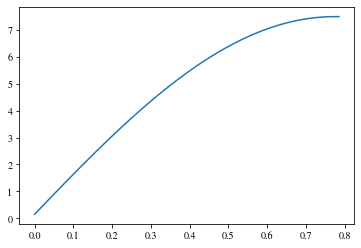

In [134]:
plt.plot(times0,Result_varDDTWA_EM_Theta[0])

In [144]:
Phi

1.5707963267948966

## Rotate $\phi/2$

In [145]:

dt1 = 0.0001# Time step.
T1 = Phi/2 # Total time.
n1 = int(T1 / dt1) # Number of time steps.
steps1=int(T1/dt1)

In [146]:






@jit

def trayectory_R_Phi_Theta(N,Stochastic):
    sqrtdt1 = np.sqrt(dt1)*Stochastic


    Rot_Theta=trayectory_RTheta(N,0)
    
    Results =zeros((15*N+4, n1))
    
    Results[15*N][0]   = 0
    Results[15*N+1][0] = 0
    Results[15*N+2][0] = 0
    Results[15*N+3][0] = 0
    
    
    for j in range(N):        
        
        Results[j][0]     =Rot_Theta[j][-1]  #x10  
        Results[j+N][0]   =Rot_Theta[j+N][-1]  #x20
        Results[j+2*N][0] =Rot_Theta[j+2*N][-1]  #x30
        Results[j+3*N][0] =Rot_Theta[j+3*N][-1]  #x21
        Results[j+4*N][0] =Rot_Theta[j+4*N][-1]  #x31
        Results[j+5*N][0] =Rot_Theta[j+5*N][-1]  #x32
        
        Results[j+6*N][0] =Rot_Theta[j+6*N][-1]  #y10
        Results[j+7*N][0] =Rot_Theta[j+7*N][-1]  #y20
        Results[j+8*N][0] =Rot_Theta[j+8*N][-1]  #y30
        Results[j+9*N][0] =Rot_Theta[j+9*N][-1]  #y21
        Results[j+10*N][0]=Rot_Theta[j+10*N][-1] #y31
        Results[j+11*N][0]=Rot_Theta[j+11*N][-1] #y32
        
        Results[j+12*N][0]=Rot_Theta[j+12*N][-1]  #z10
        Results[j+13*N][0]=Rot_Theta[j+13*N][-1]  #z21
        Results[j+14*N][0]=Rot_Theta[j+14*N][-1]  #z32
    
    for t in range(n1-1):
      
        
        alpRx=Results[15*N][t]
        alpRy=Results[15*N+1][t]
        alpLx=Results[15*N+2][t]
        alpLy=Results[15*N+3][t]
        
        
        
        Results[15*N][t+1]   = alpRx
            
        Results[15*N+1][t+1] = alpRy
             
        Results[15*N+2][t+1] = alpLx  
        
        Results[15*N+3][t+1] = alpLy  
                
                
        for i in range(N): 
            
                     
            s10x=Results[i][t]       #x10
            s20x=Results[i+N][t]     #x20
            s30x=Results[i+2*N][t]   #x30  
            s21x=Results[i+3*N][t]   #x21 
            s31x=Results[i+4*N][t]   #x31
            s32x=Results[i+5*N][t]   #x32
            
            s10y=Results[i+6*N][t]   #y10
            s20y=Results[i+7*N][t]   #y20
            s30y=Results[i+8*N][t]   #y30
            s21y=Results[i+9*N][t]   #y21
            s31y=Results[i+10*N][t]  #y31
            s32y=Results[i+11*N][t]  #y32
            
            s0z=Results[i+12*N][t]  #z0
            s1z=Results[i+13*N][t]  #z1
            s2z=Results[i+14*N][t]  #z2
            
            # alpRx=Results[15*N][t]
            # alpRy=Results[15*N+1][t]
            # alpLx=Results[15*N+2][t]
            # alpLy=Results[15*N+3][t]
            
            
            Results[i][t+1]     = s10x  +dt1*(-2)*(s10y)
            
            Results[i+N][t+1]   = s20x  +dt1*(-s20y)
            
            Results[i+2*N][t+1] = s30x  +dt1*(-s30y)
            
            Results[i+3*N][t+1] = s21x  +dt1*(s20y)

            Results[i+4*N][t+1] = s31x  +dt1*(s30y)

            Results[i+5*N][t+1] = s32x  

            Results[i+6*N][t+1] = s10y +dt1*(2)*(s10x)

            Results[i+7*N][t+1] = s20y   +dt1*(s20x)

            Results[i+8*N][t+1] = s30y   +dt1*(s30x)
            
            Results[i+9*N][t+1] = s21y  +dt1*(-s21x)
            
            Results[i+10*N][t+1] = s31y + dt1*(s31x)
            
            Results[i+11*N][t+1] = s32y 
            
            Results[i+12*N][t+1] = s0z
            
            Results[i+13*N][t+1] = s1z
            
            Results[i+14*N][t+1] = s2z
            
        
            
    return Results


In [147]:
from numpy import mean
from numpy import linalg

from numba import jit
@jit

def summary_stat(Res,N=N,n=n1):
    Results =zeros((19, n))
    count=0
    while count<n:
        s10x,s20x,s30x=Res[0:N, count:count+1],Res[N:2*N, count:count+1],Res[2*N:3*N, count:count+1]
        s21x,s31x,s32x=Res[3*N:4*N, count:count+1],Res[4*N:5*N, count:count+1],Res[5*N:6*N, count:count+1]
        
        s10y,s20y,s30y=Res[6*N:7*N, count:count+1],Res[7*N:8*N, count:count+1],Res[8*N:9*N, count:count+1]
        s21y,s31y,s32y=Res[9*N:10*N, count:count+1],Res[10*N:11*N, count:count+1],Res[11*N:12*N, count:count+1]
        
        s0z,s1z,s2z=Res[12*N:13*N, count:count+1],Res[13*N:14*N, count:count+1],Res[14*N:15*N, count:count+1]
        
        
        alpha_Rx=mean(Res[15*N:15*N+1, count:count+1])
        alpha_Ry=mean(Res[15*N+1:15*N+2, count:count+1])
        alpha_Lx=mean(Res[15*N+2:15*N+3, count:count+1])
        alpha_Ly=mean(Res[15*N+3:15*N+4, count:count+1])
        
        
        Results[0][count],Results[1][count],Results[2][count]=N*mean(s10x)/sqrt(2),N*mean(s20x)/sqrt(2),N*mean(s30x)/sqrt(2)
        Results[3][count],Results[4][count],Results[5][count]=N*mean(s21x)/sqrt(2),N*mean(s31x)/sqrt(2),N*mean(s32x)/sqrt(2)

        Results[6][count],Results[7][count],Results[8][count]=N*mean(s10y)/sqrt(2),N*mean(s20y)/sqrt(2),N*mean(s30y)/sqrt(2)
        Results[9][count],Results[10][count],Results[11][count]=N*mean(s21y)/sqrt(2),N*mean(s31y)/sqrt(2),N*mean(s32y)/sqrt(2)
        
        Results[12][count],Results[13][count],Results[14][count]=N*mean(s0z)/2,N*mean(s1z)/2,N*mean(s2z)/2
        
        Results[15][count],Results[16][count]=alpha_Rx,alpha_Ry
        Results[17][count],Results[18][count]=alpha_Lx,alpha_Ly
        
        
        count=count+1
        
    
    return Results

In [148]:
from numpy import add
from numba import jit



itera=5000
@jit

def averages_theta_phi(Stochastic,itera=itera,N=N,n=n1):
    Results =zeros((19, n))
    for j in range(itera):
        Trayec=trayectory_R_Phi_Theta(N,Stochastic)
        Results=add(Results,summary_stat(Trayec,N,n))
    
    return Results/itera
    
    
    
    

In [149]:
t0=time.time()

itera=1000

Result_varDDTWA_EM_Full_rot = averages_theta_phi(0,itera=itera,N=N,n=n1)
#Result_varDTWA_EM  = averages(0,itera=itera,N=N,n=n)



t1=time.time()

print(t1-t0)

<ipython-input-148-e6fdd892dfd6>:7: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "averages_theta_phi" failed type inference due to: Invalid use of type(CPUDispatcher(<function trayectory_R_Phi_Theta at 0x7f543dee23b0>)) with parameters (int64, int64)

During: resolving callee type: type(CPUDispatcher(<function trayectory_R_Phi_Theta at 0x7f543dee23b0>))
During: typing of call at <ipython-input-148-e6fdd892dfd6> (12)


File "<ipython-input-148-e6fdd892dfd6>", line 12:
def averages_theta_phi(Stochastic,itera=itera,N=N,n=n1):
    <source elided>
    for j in range(itera):
        Trayec=trayectory_R_Phi_Theta(N,Stochastic)
        ^

  @jit
<ipython-input-148-e6fdd892dfd6>:7: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "averages_theta_phi" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-148-e6fdd892d

54.73637413978577


In [150]:
times1=np.linspace(0,T1,steps1)


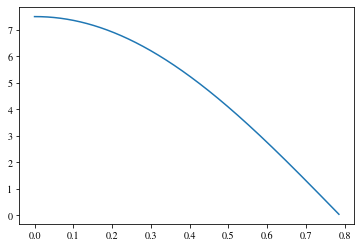

In [151]:
ind=0

plt.plot(times1,Result_varDDTWA_EM_Full_rot[ind])




## DDTWA Dynamics

In [152]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import random, zeros, sqrt,cos,sin



matrix_array=[]


from numba import jit

dt = 0.0001# Time step.
T = 120 # Total time.
n = int(T / dt) # Number of time steps.
steps=int(T/dt)

times = np.linspace(0., T, n)

gR=1
DeltaR=0
KapR= 20
OmegaR= 0.9*N/(KapR+1e-10)


gL=1
DeltaL=0
KapL=20
OmegaL= 0.9* N/(KapL+1e-10) 


Gamma_du=0  #Fixed


sqrt_N=np.sqrt(N)


    

from scipy import stats


In [153]:
from numpy import add
from numba import jit



itera=5000
@jit

def averages(Stochastic,itera=itera,N=N,n=n):
    Results =zeros((19, n))
    for j in range(itera):
        Trayec=trayectory(N,Stochastic)
        Results=add(Results,Trayec)
    
    return Results/itera
    
    
    
    

In [154]:


#set the initial values due to the measurements in the state |\psi>=cos(\theta/2)|0>+sin(\theta/2)|1>


theta = Theta
phi   = Phi

#-----------------------------------------------------------------------------------------------------



from scipy import stats


@jit

def trayectory_D(N,Stochastic):
    sqrtdt = np.sqrt(dt)*Stochastic
    
    Results =zeros((15*N+4, n))
    
    Results[15*N][0]   = np.random.normal(0, 0.5)
    Results[15*N+1][0] = np.random.normal(0, 0.5)
    Results[15*N+2][0] = np.random.normal(0, 0.5)
    Results[15*N+3][0] = np.random.normal(0, 0.5)
    
    if Phi!=0:  
        Rot_state=trayectory_R_Phi_Theta(N,0)
    else:
        Rot_state=trayectory_RTheta(N,0)
        
    
    for j in range(N):        
        
        Results[j][0]     =Rot_state[j][-1]      #x10  
        Results[j+N][0]   =Rot_state[j+N][-1]    #x20
        Results[j+2*N][0] =Rot_state[j+2*N][-1]  #x30
        Results[j+3*N][0] =Rot_state[j+3*N][-1]  #x21
        Results[j+4*N][0] =Rot_state[j+4*N][-1]  #x31
        Results[j+5*N][0] =Rot_state[j+5*N][-1]  #x32
        
        Results[j+6*N][0] =Rot_state[j+6*N][-1]  #y10
        Results[j+7*N][0] =Rot_state[j+7*N][-1]  #y20
        Results[j+8*N][0] =Rot_state[j+8*N][-1]  #y30
        Results[j+9*N][0] =Rot_state[j+9*N][-1]  #y21
        Results[j+10*N][0]=Rot_state[j+10*N][-1] #y31
        Results[j+11*N][0]=Rot_state[j+11*N][-1] #y32
        
        Results[j+12*N][0]=Rot_state[j+12*N][-1] #z10
        Results[j+13*N][0]=Rot_state[j+13*N][-1] #z21
        Results[j+14*N][0]=Rot_state[j+14*N][-1] #z32
    
    for t in range(n-1):
        
        Normal_VA_1=random.randn() #np.random.normal(0, 1)
        Normal_VA_2=random.randn() #np.random.normal(0, 1)
        Normal_VA_3=random.randn() #np.random.normal(0, 1)
        Normal_VA_4=random.randn() #np.random.normal(0, 1)
        
        
        alpRx=Results[15*N][t]
        alpRy=Results[15*N+1][t]
        alpLx=Results[15*N+2][t]
        alpLy=Results[15*N+3][t]
        
        
        
        Results[15*N][t+1]   = alpRx-dt*DeltaR*alpRy-dt*(KapR/2)*alpRx+np.sqrt(KapR/4)*sqrtdt * Normal_VA_1
            
        Results[15*N+1][t+1] = alpRy+dt*DeltaR*alpRx-dt*(KapR/2)*alpRy+np.sqrt(KapR/4)*sqrtdt * Normal_VA_2
             
        Results[15*N+2][t+1] = alpLx -dt*DeltaL*alpLy-dt*(KapL/2)*alpLx+np.sqrt(KapL/4)*sqrtdt * Normal_VA_3  
        
        Results[15*N+3][t+1] = alpLy +dt*DeltaL*alpLx-dt*(KapL/2)*alpLy+np.sqrt(KapL/4)*sqrtdt * Normal_VA_4  
                
                
        for i in range(N): 
            
                     
            s10x=Results[i][t]       #x10
            s20x=Results[i+N][t]     #x20
            s30x=Results[i+2*N][t]   #x30  
            s21x=Results[i+3*N][t]   #x21 
            s31x=Results[i+4*N][t]   #x31
            s32x=Results[i+5*N][t]   #x32
            
            s10y=Results[i+6*N][t]   #y10
            s20y=Results[i+7*N][t]   #y20
            s30y=Results[i+8*N][t]   #y30
            s21y=Results[i+9*N][t]   #y21
            s31y=Results[i+10*N][t]  #y31
            s32y=Results[i+11*N][t]  #y32
            
            s0z=Results[i+12*N][t]  #z0
            s1z=Results[i+13*N][t]  #z1
            s2z=Results[i+14*N][t]  #z2
            
            # alpRx=Results[15*N][t]
            # alpRy=Results[15*N+1][t]
            # alpLx=Results[15*N+2][t]
            # alpLy=Results[15*N+3][t]
            
            
            Results[i][t+1]     = s10x  +dt*(-gR)*(alpRy*s31x-alpRx*s31y) +dt*(OmegaR/2)*s31y-\
                dt*gL*(alpLy*s20x-alpLx*s20y)+dt*(OmegaL/2)*s20y
            
            Results[i+N][t+1]   = s20x  +dt*(-gR)*(alpRy*s32x-alpRx*s32y) +dt*(OmegaR/2)*s32y+\
                dt*gL*(alpLx*s10y+alpLy*s10x)+dt*(OmegaL/2)*s10y
            
            Results[i+2*N][t+1] = s30x  +dt*(-sqrt(2)*gR)*alpRy*(1-s2z-s1z-2*s0z)
            
            Results[i+3*N][t+1] = s21x  +dt*(-sqrt(2)*gL)*alpLy*(s2z-s1z)
            
            Results[i+4*N][t+1] = s31x  +dt*gR*(alpRy*s10x-alpRx*s10y)+dt*(-OmegaR/2)*s10y-\
                dt*gL*(alpLx*s32y+alpLy*s32x)+dt*(-OmegaL/2)*s32y
            
            Results[i+5*N][t+1] = s32x  +dt*gR*(alpRy*s20x-alpRx*s20y)+dt*(-OmegaR/2)*s20y+\
                dt*gL*(alpLy*s31x-alpLx*s31y)+dt*(-OmegaL/2)*s31y
            
            Results[i+6*N][t+1] = s10y  +dt*(gR)*(alpRx*s31x+alpRy*s31y)+dt*(OmegaR/2)*s31x-\
                dt*gL*(alpLx*s20x+alpLy*s20y)+dt*(-OmegaL/2)*s20x
            
            Results[i+7*N][t+1] = s20y  +dt*(gR)*(alpRx*s32x+alpRy*s32y)+dt*(OmegaR/2)*s32x-\
                dt*gL*(alpLx*s10x-alpLy*s10y)+dt*(-OmegaL/2)*s10x
            
            Results[i+8*N][t+1] = s30y  +dt*(2*gR*alpRx+OmegaR)*( 1-s2z-s1z-2*s0z  )/sqrt(2)
            
            Results[i+9*N][t+1] = s21y  +dt*(2*gL*alpLx+OmegaL)*(s2z-s1z)/sqrt(2)
            
            Results[i+10*N][t+1] = s31y + dt*(-gR)*(alpRx*s10x+alpRy*s10y)+dt*(-OmegaR/2)*s10x+\
                dt*gL*(alpLx*s32x-alpLy*s32y)+dt*(OmegaL/2)*s32x
            
            Results[i+11*N][t+1] = s32y + dt*(-gR)*(alpRx*s20x+alpRy*s20y)-dt*(OmegaR/2)*s20x+\
                dt*gL*(alpLx*s31x+alpLy*s31y)+dt*(OmegaL/2)*s31x
            
            Results[i+12*N][t+1] = s0z+ dt*(sqrt(2))*(gR*(alpRx*s30y-alpRy*s30x)+ (OmegaR/2)*s30y )
            
            Results[i+13*N][t+1] = s1z+ dt*(sqrt(2))*(gL*(-alpLy*s21x+alpLx*s21y) + (OmegaL/2)*s21y )
            
            Results[i+14*N][t+1] = s2z+ dt*(-sqrt(2))*(gL*(-alpLy*s21x+alpLx*s21y) + (OmegaL/2)*s21y )
            
            
            
            Results[15*N][t+1]   +=   (gR/sqrt(2))*dt*s30y
            Results[15*N+1][t+1] +=  -(gR/sqrt(2))*dt*s30x
            Results[15*N+2][t+1] +=   (gL/sqrt(2))*dt*s21y
            Results[15*N+3][t+1] +=  -(gL/sqrt(2))*dt*s21x
            
    return Results


In [155]:
from numpy import mean
from numpy import linalg

from numba import jit
@jit

def summary_stat(Res,N=N,n=n):
    Results =zeros((19, n))
    count=0
    while count<n:
        s10x,s20x,s30x=Res[0:N, count:count+1],Res[N:2*N, count:count+1],Res[2*N:3*N, count:count+1]
        s21x,s31x,s32x=Res[3*N:4*N, count:count+1],Res[4*N:5*N, count:count+1],Res[5*N:6*N, count:count+1]
        
        s10y,s20y,s30y=Res[6*N:7*N, count:count+1],Res[7*N:8*N, count:count+1],Res[8*N:9*N, count:count+1]
        s21y,s31y,s32y=Res[9*N:10*N, count:count+1],Res[10*N:11*N, count:count+1],Res[11*N:12*N, count:count+1]
        
        s0z,s1z,s2z=Res[12*N:13*N, count:count+1],Res[13*N:14*N, count:count+1],Res[14*N:15*N, count:count+1]
        
        
        alpha_Rx=mean(Res[15*N:15*N+1, count:count+1])
        alpha_Ry=mean(Res[15*N+1:15*N+2, count:count+1])
        alpha_Lx=mean(Res[15*N+2:15*N+3, count:count+1])
        alpha_Ly=mean(Res[15*N+3:15*N+4, count:count+1])
        
        
        Results[0][count],Results[1][count],Results[2][count]=N*mean(s10x)/sqrt(2),N*mean(s20x)/sqrt(2),N*mean(s30x)/sqrt(2)
        Results[3][count],Results[4][count],Results[5][count]=N*mean(s21x)/sqrt(2),N*mean(s31x)/sqrt(2),N*mean(s32x)/sqrt(2)

        Results[6][count],Results[7][count],Results[8][count]=N*mean(s10y)/sqrt(2),N*mean(s20y)/sqrt(2),N*mean(s30y)/sqrt(2)
        Results[9][count],Results[10][count],Results[11][count]=N*mean(s21y)/sqrt(2),N*mean(s31y)/sqrt(2),N*mean(s32y)/sqrt(2)
        
        Results[12][count],Results[13][count],Results[14][count]=N*mean(s0z)/2,N*mean(s1z)/2,N*mean(s2z)/2
        
        Results[15][count],Results[16][count]=alpha_Rx,alpha_Ry
        Results[17][count],Results[18][count]=alpha_Lx,alpha_Ly
        
        
        count=count+1
        
    
    return Results

In [156]:
from numpy import add
from numba import jit



itera=5000
@jit

def averages_D(Stochastic,itera=itera,N=N,n=n):
    Results =zeros((19, n))
    for j in range(itera):
        Trayec=trayectory_D(N,Stochastic)
        Results=add(Results,summary_stat(Trayec,N,n))
    
    return Results/itera
    
    
    
    

In [ ]:
t0=time.time()

itera=200

Result_varDDTWA_EM = averages_D(1,itera=itera,N=N,n=n)

#Result_varDTWA_EM  = averages(0,itera=itera,N=N,n=n)



t1=time.time()

print(t1-t0)

<ipython-input-156-e78c70012492>:7: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "averages_D" failed type inference due to: Invalid use of type(CPUDispatcher(<function trayectory_D at 0x7f543ee809e0>)) with parameters (int64, int64)

During: resolving callee type: type(CPUDispatcher(<function trayectory_D at 0x7f543ee809e0>))
During: typing of call at <ipython-input-156-e78c70012492> (12)


File "<ipython-input-156-e78c70012492>", line 12:
def averages_D(Stochastic,itera=itera,N=N,n=n):
    <source elided>
    for j in range(itera):
        Trayec=trayectory_D(N,Stochastic)
        ^

  @jit
<ipython-input-156-e78c70012492>:7: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "averages_D" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-156-e78c70012492>", line 11:
def averages_D(Stochastic,itera=itera,N

In [ ]:
index=0

plt.plot(times,Result_varDDTWA_EM[index])

In [ ]:
print(Theta,Phi)

In [ ]:
#--------------------------------------------------------------------------------------

In [ ]:
theta=Theta
phi=Phi

mk = np.array([-1/sqrt(2),0,1/sqrt(2)])

mzk=np.array([0,1])


x10=( 0.5* (1-cos(phi)*sin(theta)), 0 , 0.5* (1+cos(phi)*sin(theta)))
x20=( 0.5* (cos(theta/2))**2, (sin(theta/2))**2, 0.5* (cos(theta/2))**2)
x30=( 0.5* (cos(theta/2))**2, (sin(theta/2))**2, 0.5* (cos(theta/2))**2)
x21=( 0.5* (sin(theta/2))**2, (cos(theta/2))**2, 0.5* (sin(theta/2))**2)
x31=( 0.5* (sin(theta/2))**2, (cos(theta/2))**2, 0.5* (sin(theta/2))**2)
x32=(0,1,0)

y10=( 0.5* (1-sin(phi)*sin(theta)), 0 , 0.5* (1+sin(phi)*sin(theta)))
y20=( 0.5* (cos(theta/2))**2, (sin(theta/2))**2, 0.5* (cos(theta/2))**2)
y30=( 0.5* (cos(theta/2))**2, (sin(theta/2))**2, 0.5* (cos(theta/2))**2)
y21=( 0.5* (sin(theta/2))**2, (cos(theta/2))**2, 0.5* (sin(theta/2))**2)
y31=( 0.5* (sin(theta/2))**2, (cos(theta/2))**2, 0.5* (sin(theta/2))**2)
y32=(0,1,0)

z0=((sin(theta/2))**2,(cos(theta/2))**2)
z1=((cos(theta/2))**2,(sin(theta/2))**2)
z2=(1,0)


@jit 
def sum_rand_vect(N=N):
    
    Sum=np.zeros(15)
    
    for j in range(N):
        vx10=np.random.choice(mk,1,p=x10)[0]
        vx20=np.random.choice(mk,1,p=x20)[0]
        vx30=np.random.choice(mk,1,p=x30)[0]
        vx21=np.random.choice(mk,1,p=x21)[0]
        vx31=np.random.choice(mk,1,p=x31)[0]
        vx32=np.random.choice(mk,1,p=x32)[0]
    
        vy10=np.random.choice(mk,1,p=y10)[0]
        vy20=np.random.choice(mk,1,p=y20)[0]
        vy30=np.random.choice(mk,1,p=y30)[0]
        vy21=np.random.choice(mk,1,p=y21)[0]
        vy31=np.random.choice(mk,1,p=y31)[0]
        vy32=np.random.choice(mk,1,p=y32)[0]
        
        vz0=np.random.choice(mzk,1,p=z0)[0]  #z10
        vz1=np.random.choice(mzk,1,p=z1)[0]  #z21
        vz2=np.random.choice(mzk,1,p=z2)[0]  #z32
        
        
        Part_res=np.array([vx10,vx20,vx30,vx21,vx31,vx32,vy10,vy20,vy30,vy21,vy31, vy32,vz0,vz1,vz2])
        
        Sum=Sum+Part_res
    
    return Sum


In [ ]:
def trayectory_col_cum(N=N,Stochastic=Stochastic):
    sqrtdt = np.sqrt(dt)*Stochastic
    
    Results =zeros((19, n))
    
    Results[15][0] = np.random.normal(0, 0.5)
    Results[16][0] = np.random.normal(0, 0.5)
    Results[17][0] = np.random.normal(0, 0.5)
    Results[18][0] = np.random.normal(0, 0.5)
    
    
    Arr=sum_rand_vect(N)
    
    
    Results[0][0] =Arr[0]  #x10  
    Results[1][0] =Arr[1]  #x20
    Results[2][0] =Arr[2]  #x30
    Results[3][0] =Arr[3]  #x21
    Results[4][0] =Arr[4]  #x31
    Results[5][0] =Arr[5]  #x32
        
    Results[6][0] =Arr[6]  #y10
    Results[7][0] =Arr[7] #y20
    Results[8][0] =Arr[8]  #y30
    Results[9][0] =Arr[9]  #y21
    Results[10][0]=Arr[10]  #y31
    Results[11][0]=Arr[11]  #y32
        
    Results[12][0]=Arr[12]  #z0
    Results[13][0]=Arr[13]  #z2
    Results[14][0]=Arr[14]  #z3
    
    
    for t in range(n-1):
        
        Normal_VA_1=random.randn() #np.random.normal(0, 1)
        Normal_VA_2=random.randn() #np.random.normal(0, 1)
        Normal_VA_3=random.randn() #np.random.normal(0, 1)
        Normal_VA_4=random.randn() #np.random.normal(0, 1)
        
        
        alpRx=Results[15][t]
        alpRy=Results[16][t]
        alpLx=Results[17][t]
        alpLy=Results[18][t]
            
        s10x=Results[0][t]   #x10
        s20x=Results[1][t]   #x20
        s30x=Results[2][t]   #x30  
        s21x=Results[3][t]   #x21 
        s31x=Results[4][t]   #x31
        s32x=Results[5][t]   #x32
            
        s10y=Results[6][t]   #y10
        s20y=Results[7][t]   #y20
        s30y=Results[8][t]   #y30
        s21y=Results[9][t]   #y21
        s31y=Results[10][t]  #y31
        s32y=Results[11][t]  #y32
            
        s0z=Results[12][t]   #z0
        s1z=Results[13][t]   #z1
        s2z=Results[14][t]   #z2
            
        # alpRx=Results[15*N][t]
        # alpRy=Results[15*N+1][t]
        # alpLx=Results[15*N+2][t]
        # alpLy=Results[15*N+3][t]
        
        
        Results[15][t+1] = alpRx-dt*DeltaR*alpRy-dt*(KapR/2)*alpRx+np.sqrt(KapR/4)*sqrtdt * Normal_VA_1 +(gR/sqrt(2))*dt*s30y
            
        Results[16][t+1] = alpRy+dt*DeltaR*alpRx-dt*(KapR/2)*alpRy+np.sqrt(KapR/4)*sqrtdt * Normal_VA_2 -(gR/sqrt(2))*dt*s30x
             
        Results[17][t+1] = alpLx -dt*DeltaL*alpLy-dt*(KapL/2)*alpLx+np.sqrt(KapL/4)*sqrtdt * Normal_VA_3 +(gL/sqrt(2))*dt*s21y 
        
        Results[18][t+1] = alpLy +dt*DeltaL*alpLx-dt*(KapL/2)*alpLy+np.sqrt(KapL/4)*sqrtdt * Normal_VA_4 -(gL/sqrt(2))*dt*s21x 
         
      
        
        Results[0][t+1] = s10x  +dt*(-gR)*(-alpRx*s31y+alpRy*s31x) +dt*(OmegaR/2)*s31y-\
            dt*gL*(-alpLx*s20y+alpLy*s20x)+dt*(OmegaL/2)*s20y
            
        Results[1][t+1] = s20x  +dt*(-gR)*(-alpRx*s32y+alpRy*s32x) +dt*(OmegaR/2)*s32y+\
            dt*gL*(alpLx*s10y+alpLy*s10x)+dt*(OmegaL/2)*s10y
            
        Results[2][t+1] = s30x  +dt*(-sqrt(2)*gR)*alpRy*(N-s2z-s1z-2*s0z)
            
        Results[3][t+1] = s21x  +dt*(-sqrt(2)*gL)*alpLy*(s2z-s1z)
            
        Results[4][t+1] = s31x  +dt*gR*(alpRy*s10x-alpRx*s10y)+dt*(-OmegaR/2)*s10y-\
            dt*gL*(alpLx*s32y+alpLy*s32x)+dt*(-OmegaL/2)*s32y    
            
        Results[5][t+1] = s32x  +dt*gR*(-alpRx*s20y+alpRy*s20x)+dt*(-OmegaR/2)*s20y+\
            dt*gL*(-alpLx*s31y+alpLy*s31x)+dt*(-OmegaL/2)*s31y
        
        Results[6][t+1] = s10y  +dt*(gR)*(alpRx*s31x+alpRy*s31y)+dt*(OmegaR/2)*s31x-\
            dt*gL*(alpLx*s20x+alpLy*s20y)-dt*(OmegaL/2)*s20x
        
        Results[7][t+1] = s20y  +dt*(gR)*(alpRx*s32x+alpRy*s32y)+dt*(OmegaR/2)*s32x-\
            dt*gL*(alpLx*s10x-alpLy*s10y)+dt*(-OmegaL/2)*s10x

        Results[8][t+1] = s30y  +dt*(2*gR*alpRx+OmegaR)*( N-s2z-s1z-2*s0z  )/sqrt(2)
                
        Results[9][t+1] = s21y  +dt*(2*gL*alpLx+OmegaL)*(s2z-s1z)/sqrt(2)
        
        Results[10][t+1] = s31y - dt*gR*(alpRx*s10x+alpRy*s10y)-dt*(OmegaR/2)*s10x+\
            dt*gL*(alpLx*s32x-alpLy*s32y)+dt*(OmegaL/2)*s32x
            
        Results[11][t+1] = s32y + dt*(-gR)*(alpRx*s20x+alpRy*s20y)-dt*(OmegaR/2)*s20x+\
            dt*gL*(alpLx*s31x+alpLy*s31y)+dt*(OmegaL/2)*s31x
        
        Results[12][t+1] = s0z+ dt*(sqrt(2))*(gR*(alpRx*s30y-alpRy*s30x)+ (OmegaR/2)*s30y )
        
        Results[13][t+1] = s1z+ dt*(sqrt(2))*(gL*(alpLx*s21y-alpLy*s21x)+ (OmegaL/2)*s21y )
            
        Results[14][t+1] = s2z+ dt*(-sqrt(2))*(gL*(-alpLy*s21x+alpLx*s21y)+ (OmegaL/2)*s21y )
            

            
    return Results


In [ ]:
%timeit trayectory_col_cum(15,1)

In [ ]:
np.array([x10,x20,x30,x21,x31, x32,y10,y20,y30,y21,y31, y32,z0,z1,z2])  #z32]

In [ ]:
rand_vect()

In [ ]:
np.random.choice(mk,1,p=x10)[0]

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $<S_z>$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_Col[12]/N+Result_varDDTWA_Col[13]/N,"--",label="Population g DissTWA Col")
plt.plot(times, Mean_field_res[12]/N+Mean_field_res[13]/N,"-",label="Population g Mean-Field")
plt.plot(times, 2*Result_varDDTWA_EM[12]/N+2*Result_varDDTWA_EM[13]/N,"-",label="Population g DDTWA")


#plt.plot(times, Result_varDTWA_Col[12]/2,"-",label="$S^z_{0}$ TWA Col")




plt.plot(times, 0*times,"-",label="$<S_k>=0$")

#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

## Results DisTWA and TWA Collective

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $S_x$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)


matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $S_x$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_Col[0]/sqrt(2),"-",label="$S^x_{10}$ DisTWA Col")

#plt.plot(times, Result_varDDTWA_Col[1]/sqrt(2),"-",label="$S^x_{20}$ DisTWA Col")

#plt.plot(times, Result_varDDTWA_Col[2]/sqrt(2),"-",label="$S^x_{30}$ DisTWA Col")

#plt.plot(times, Result_varDDTWA_Col[3]/sqrt(2),"-",label="$S^x_{21}$ DisTWA Col")

#plt.plot(times, Result_varDDTWA_Col[4]/sqrt(2),"-",label="$S^x_{31}$ DisTWA Col")

#plt.plot(times, Result_varDDTWA_Col[5]/sqrt(2),"-",label="$S^x_{32}$ DisTWA Col")



#plt.plot(times, Result_varDTWA_Col [0]/sqrt(2),"--",label="$S^x_{10}$ TWA Col")

#plt.plot(times, Result_varDTWA_Col [1]/sqrt(2),"--",label="$S^x_{20}$ TWA Col")

#plt.plot(times, Result_varDTWA_Col [2]/sqrt(2),"--",label="$S^x_{30}$ TWA Col")

#plt.plot(times,Result_varDTWA_Col [3]/sqrt(2),"--",label="$S^x_{21}$ TWA Col")

#plt.plot(times, Result_varDTWA_Col [4]/sqrt(2),"--",label="$S^x_{31}$ TWA Col")

#plt.plot(times, Result_varDTWA_Col [5]/sqrt(2),"--",label="$S^x_{32}$ TWA Col")




plt.plot(times, Mean_field_res[0]/sqrt(2),"-",label="$S^x_{10}$ Mean-Field")

#plt.plot(times, Mean_field_res[1]/sqrt(2),"-",label="$S^x_{20}$ Mean-Field")

#plt.plot(times, Mean_field_res[2]/sqrt(2),"-",label="$S^x_{30}$ Mean-Field")

#plt.plot(times, Mean_field_res[3]/sqrt(2),"-",label="$S^x_{21}$ Mean-Field")

#plt.plot(times, Mean_field_res[4]/sqrt(2),"-",label="$S^x_{31}$ Mean-Field")

#plt.plot(times, Mean_field_res[5]/sqrt(2),"-",label="$S^x_{32}$ Mean-Field")




plt.plot(times, Result_varDDTWA_EM[0],"-",label="$S^x_{10}$ DDTWA")

#plt.plot(times, Result_varDDTWA_EM[1],"-",label="$S^x_{20}$ DDTWA")

#plt.plot(times, Result_varDDTWA_EM[2],"-",label="$S^x_{30}$ DDTWA")

#plt.plot(times, Result_varDDTWA_EM[3],"-",label="$S^x_{21}$ DDTWA")

#plt.plot(times, Result_varDDTWA_EM[4],"-",label="$S^x_{31}$ DDTWA")

#plt.plot(times, Result_varDDTWA_EM[5],"-",label="$S^x_{32}$ DDTWA")




plt.plot(times, 0*times,"-",label="$<S_k>=0$")

#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $S_y$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)


#plt.plot(times, Result_varDDTWA_Col[6]/sqrt(2),"--",label="$S^y_{10}$ DisTWA Col")
#plt.plot(times, Result_varDTWA_Col[6]/sqrt(2),"-",label="$S^y_{10}$ TWA Col")



#plt.plot(times, Result_varDDTWA_Col[7]/sqrt(2),"--",label="$S^y_{20}$ DisTWA Col")
#plt.plot(times, Result_varDTWA_Col[7]/sqrt(2),"-",label="$S^y_{20}$ TWA Col")



#plt.plot(times, Result_varDDTWA_Col[8]/sqrt(2),"--",label="$S^y_{30}$ DisTWA Col")
#plt.plot(times, Result_varDTWA_Col[8]/sqrt(2),"-",label="$S^y_{30}$ TWA Col")



#plt.plot(times, Result_varDDTWA_Col[9]/sqrt(2),"--",label="$S^y_{21}$ DisTWA Col")
#plt.plot(times, Result_varDTWA_Col[9]/sqrt(2),"-",label="$S^y_{21}$ TWA Col")



plt.plot(times, Result_varDDTWA_Col[10]/sqrt(2),"--",label="$S^y_{31}$ DisTWA Col")
#plt.plot(times, Result_varDTWA_Col[10]/sqrt(2),"-",label="$S^y_{31}$ TWA Col")



#plt.plot(times, Result_varDDTWA_Col[11]/sqrt(2),"--",label="$S^y_{32}$ DisTWA Col")
#plt.plot(times, Result_varDTWA_Col[11]/sqrt(2),"-",label="$S^y_{32}$ TWA Col EM")






#plt.plot(times, Mean_field_res[6]/sqrt(2),"-",label="$S^x_{10}$ Mean-Field")

#plt.plot(times, Mean_field_res[7]/sqrt(2),"-",label="$S^x_{20}$ Mean-Field")

#plt.plot(times, Mean_field_res[8]/sqrt(2),"-",label="$S^x_{30}$ Mean-Field")

#plt.plot(times, Mean_field_res[9]/sqrt(2),"-",label="$S^x_{21}$ Mean-Field")

plt.plot(times, Mean_field_res[10]/sqrt(2),"-",label="$S^x_{31}$ Mean-Field")

#plt.plot(times, Mean_field_res[11]/sqrt(2),"-",label="$S^x_{32}$ Mean-Field")




#plt.plot(times, Result_varDDTWA_EM[6],"-",label="$S^x_{10}$ DDTWA")

#plt.plot(times, Result_varDDTWA_EM[7],"-",label="$S^x_{20}$ DDTWA")

#plt.plot(times, Result_varDDTWA_EM[8],"-",label="$S^x_{30}$ DDTWA")

#plt.plot(times, Result_varDDTWA_EM[9],"-",label="$S^x_{21}$ DDTWA")

plt.plot(times, Result_varDDTWA_EM[10],"-",label="$S^x_{31}$ DDTWA")

#plt.plot(times, Result_varDDTWA_EM[11],"-",label="$S^x_{32}$ DDTWA")



plt.plot(times, 0*times,"-",label="$<S_k>=0$")

#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $<S_z>$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_Col[12]/2,"--",label="$S^z_{0}$ DisTWA Col")
#plt.plot(times, Result_varDTWA_Col[12]/2,"-",label="$S^z_{0}$ TWA Col")

plt.plot(times, Result_varDDTWA_Col[13]/2,"--",label="$S^z_{1}$ DisTWA Col")
#plt.plot(times, Result_varDTWA_Col[13]/2,"-",label="$S^z_{1}$ TWA Col")

plt.plot(times, Result_varDDTWA_Col[14]/2,"--",label="$S^z_{2}$ DisTWA Col")
#plt.plot(times, Result_varDTWA_Col[14]/2,"-",label="$S^z_{2}$ TWA Col")



plt.plot(times, Mean_field_res[12]/2,"-",label="$S^z_{0}$ Mean-Field")
plt.plot(times, Mean_field_res[13]/2,"-",label="$S^z_{1}$ Mean-Field")
plt.plot(times, Mean_field_res[14]/2,"-",label="$S^z_{2}$ Mean-Field")



plt.plot(times, Result_varDDTWA_EM[12],"--",label="$S^z_{0}$ DDTWA")
plt.plot(times, Result_varDDTWA_EM[13],"--",label="$S^z_{1}$ DDTWA")
plt.plot(times, Result_varDDTWA_EM[14],"--",label="$S^z_{2}$ DDTWA")




plt.plot(times, 0*times,"-",label="$<S_k>=0$")

#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

In [ ]:
Result_varDDTWA_EM[12][-1]

In [ ]:
plt.plot(times, Result_varDDTWA_EM[14],"--",label="$S^z_{0}$ DDTWA")

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $<a_{j\gamma}>$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle a_{j\gamma} \rangle(t)$', fontsize = label_size)


#plt.plot(times, Result_varDDTWA_Col[15],"--",label="$<a_{Rx}>$ DDTWA EM")
#plt.plot(times, Result_varDTWA_Col[15],"-",label="$<a_{Rx}>$ DTWA EM")


#plt.plot(times, Result_varDDTWA_Col[16],"--",label="$<a_{Ry}>$ DDTWA EM")
#plt.plot(times, Result_varDTWA_Col[16],"-",label="$<a_{Ry}>$ DTWA EM")


plt.plot(times, Result_varDDTWA_Col[17],"--",label="$<a_{Lx}>$ DDTWA EM")
#plt.plot(times, Result_varDTWA_Col[17],"-",label="$<a_{Lx}>$ DTWA EM")


#plt.plot(times, Result_varDDTWA_Col[18],"--",label="$<a_{Ly}>$ DDTWA EM")
#plt.plot(times, Result_varDTWA_Col[18],"-",label="$<a_{Ly}>$ DTWA EM")




#plt.plot(times, Mean_field_res[15],"-",label="$<a_{Rx}>$ Mean-Field")
#plt.plot(times, Mean_field_res[16],"-",label="$<a_{Ry}>$ Mean-Field")
plt.plot(times, Mean_field_res[17],"-",label="$<a_{Lx}>$ Mean-Field")
#plt.plot(times, Mean_field_res[18],"-",label="$<a_{Ly}>$ Mean-Field")



#plt.plot(times, Result_varDDTWA_EM[15],"-",label="$<a_{Rx}>$ DDTWA")
#plt.plot(times, Result_varDDTWA_EM[16],"-",label="$<a_{Ry}>$ DDTWA")
plt.plot(times, Result_varDDTWA_EM[17],"-",label="$<a_{Lx}>$ DDTWA")
#plt.plot(times, Result_varDDTWA_EM[18],"-",label="$<a_{Ly}>$ DDTWA")




plt.plot(times, 0*times,"-",label="$<a>=0$")

#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

In [ ]:
#------------------------------------------------------------------------------------------------

In [ ]:



matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)



matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)



j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of  $n_{g_{-1/2}}+n_{g_{1/2}}$', fontsize = label_size)
plt.xlabel(r'$N\Gamma t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)


plt.plot(times/5, Result_varDDTWA_Col[12]/60+Result_varDDTWA_Col[13]/60,"--",label="$n_{g_{-1/2}}+n_{g_{1/2}}$ DisTWA Col")
plt.plot(times/5, Result_varDTWA_Col[12]/60+Result_varDTWA_Col[13]/60,"--",label="$n_{g_{-1/2}}+n_{g_{1/2}}$ TWA Col")
plt.plot(times/5, Mean_field_res[12]/60+Mean_field_res[13]/60,"-",label="$n_{g_{-1/2}}+n_{g_{1/2}}$ Mean-Field")
plt.plot(times/5, Result_varDDTWA_EM[12]/30+Result_varDDTWA_EM[13]/30,"--",label="$n_{g_{-1/2}}+n_{g_{1/2}}$ DDTWA")




plt.plot(times/5, 0*times,"-",label="$<S_k>=0$")

#plt.legend(fontsize = label_size)
plt.legend(loc="lower left")
plt.show()
plt.close()

In [ ]:
N

In [ ]:
MF=Mean_field_res[12]/60+Mean_field_res[13]/60

In [ ]:
MF[-1]

In [ ]:
(1-0.9**2)**0.5

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $<S_z>$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_Col[12]/2-Result_varDDTWA_Col[13]/2,"--",label="$S^z_{10}$ DisTWA Col")
#plt.plot(times, Result_varDTWA_Col[12]/2,"-",label="$S^z_{0}$ TWA Col")




plt.plot(times, Mean_field_res[12]/2-Mean_field_res[13]/2,"-",label="$S^z_{10}$ Mean-Field")


plt.plot(times, Result_varDDTWA_EM[12]-Result_varDDTWA_EM[13],"--",label="$S^z_{10}$ DDTWA")




plt.plot(times, 0*times,"-",label="$<S_k>=0$")

#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

In [ ]:
Yu=Mean_field_res[12]/2-Mean_field_res[13]/2

In [ ]:
Yu[-1]

In [ ]:
Stochastic

In [ ]:
sum_rand_vect(N)

In [ ]:
Stochastic=1

@jit



def trayectory_col_sum(N=N,Stochastic=Stochastic):
    sqrtdt = np.sqrt(dt)*Stochastic
    
    Results =zeros((19, n))
    
    Results[15][0] = np.random.normal(0, 0.5)
    Results[16][0] = np.random.normal(0, 0.5)
    Results[17][0] = np.random.normal(0, 0.5)
    Results[18][0] = np.random.normal(0, 0.5)
    
        
    
    Arr=sum_rand_vect(N)
    
    
    Results[0][0] =Arr[0]  #x10  
    Results[1][0] =Arr[1]  #x20
    Results[2][0] =Arr[2]  #x30
    Results[3][0] =Arr[3]  #x21
    Results[4][0] =Arr[4]  #x31
    Results[5][0] =Arr[5]  #x32
        
    Results[6][0] =Arr[6]  #y10
    Results[7][0] =Arr[7] #y20
    Results[8][0] =Arr[8]  #y30
    Results[9][0] =Arr[9]  #y21
    Results[10][0]=Arr[10]  #y31
    Results[11][0]=Arr[11]  #y32
        
    Results[12][0]=Arr[12]  #z0
    Results[13][0]=Arr[13]  #z2
    Results[14][0]=Arr[14]  #z3
    
    
    for t in range(n-1):
        
        Normal_VA_1=random.randn() #np.random.normal(0, 1)
        Normal_VA_2=random.randn() #np.random.normal(0, 1)
        Normal_VA_3=random.randn() #np.random.normal(0, 1)
        Normal_VA_4=random.randn() #np.random.normal(0, 1)
        
        
        alpRx=Results[15][t]
        alpRy=Results[16][t]
        alpLx=Results[17][t]
        alpLy=Results[18][t]
            
        s10x=Results[0][t]   #x10
        s20x=Results[1][t]   #x20
        s30x=Results[2][t]   #x30  
        s21x=Results[3][t]   #x21 
        s31x=Results[4][t]   #x31
        s32x=Results[5][t]   #x32
            
        s10y=Results[6][t]   #y10
        s20y=Results[7][t]   #y20
        s30y=Results[8][t]   #y30
        s21y=Results[9][t]   #y21
        s31y=Results[10][t]  #y31
        s32y=Results[11][t]  #y32
            
        s0z=Results[12][t]   #z0
        s1z=Results[13][t]   #z1
        s2z=Results[14][t]   #z2
            
        # alpRx=Results[15*N][t]
        # alpRy=Results[15*N+1][t]
        # alpLx=Results[15*N+2][t]
        # alpLy=Results[15*N+3][t]
        
        
        Results[15][t+1] = alpRx-dt*DeltaR*alpRy-dt*(KapR/2)*alpRx+np.sqrt(KapR/4)*sqrtdt * Normal_VA_1 +(gR/sqrt(2))*dt*s30y
            
        Results[16][t+1] = alpRy+dt*DeltaR*alpRx-dt*(KapR/2)*alpRy+np.sqrt(KapR/4)*sqrtdt * Normal_VA_2 -(gR/sqrt(2))*dt*s30x
             
        Results[17][t+1] = alpLx -dt*DeltaL*alpLy-dt*(KapL/2)*alpLx+np.sqrt(KapL/4)*sqrtdt * Normal_VA_3 +(gL/sqrt(2))*dt*s21y 
        
        Results[18][t+1] = alpLy +dt*DeltaL*alpLx-dt*(KapL/2)*alpLy+np.sqrt(KapL/4)*sqrtdt * Normal_VA_4 -(gL/sqrt(2))*dt*s21x 
         
      
        
        Results[0][t+1] = s10x  +dt*(-gR)*(-alpRx*s31y+alpRy*s31x) +dt*(OmegaR/2)*s31y-\
            dt*gL*(-alpLx*s20y+alpLy*s20x)+dt*(OmegaL/2)*s20y
            
        Results[1][t+1] = s20x  +dt*(-gR)*(-alpRx*s32y+alpRy*s32x) +dt*(OmegaR/2)*s32y+\
            dt*gL*(alpLx*s10y+alpLy*s10x)+dt*(OmegaL/2)*s10y
            
        Results[2][t+1] = s30x  +dt*(-sqrt(2)*gR)*alpRy*(N-s2z-s1z-2*s0z)
            
        Results[3][t+1] = s21x  +dt*(-sqrt(2)*gL)*alpLy*(s2z-s1z)
            
        Results[4][t+1] = s31x  +dt*gR*(alpRy*s10x-alpRx*s10y)+dt*(-OmegaR/2)*s10y-\
            dt*gL*(alpLx*s32y+alpLy*s32x)+dt*(-OmegaL/2)*s32y    
            
        Results[5][t+1] = s32x  +dt*gR*(-alpRx*s20y+alpRy*s20x)+dt*(-OmegaR/2)*s20y+\
            dt*gL*(-alpLx*s31y+alpLy*s31x)+dt*(-OmegaL/2)*s31y
        
        Results[6][t+1] = s10y  +dt*(gR)*(alpRx*s31x+alpRy*s31y)+dt*(OmegaR/2)*s31x-\
            dt*gL*(alpLx*s20x+alpLy*s20y)-dt*(OmegaL/2)*s20x
        
        Results[7][t+1] = s20y  +dt*(gR)*(alpRx*s32x+alpRy*s32y)+dt*(OmegaR/2)*s32x-\
            dt*gL*(alpLx*s10x-alpLy*s10y)+dt*(-OmegaL/2)*s10x

        Results[8][t+1] = s30y  +dt*(2*gR*alpRx+OmegaR)*( N-s2z-s1z-2*s0z  )/sqrt(2)
                
        Results[9][t+1] = s21y  +dt*(2*gL*alpLx+OmegaL)*(s2z-s1z)/sqrt(2)
        
        Results[10][t+1] = s31y - dt*gR*(alpRx*s10x+alpRy*s10y)-dt*(OmegaR/2)*s10x+\
            dt*gL*(alpLx*s32x-alpLy*s32y)+dt*(OmegaL/2)*s32x
            
        Results[11][t+1] = s32y + dt*(-gR)*(alpRx*s20x+alpRy*s20y)-dt*(OmegaR/2)*s20x+\
            dt*gL*(alpLx*s31x+alpLy*s31y)+dt*(OmegaL/2)*s31x
        
        Results[12][t+1] = s0z+ dt*(sqrt(2))*(gR*(alpRx*s30y-alpRy*s30x)+ (OmegaR/2)*s30y )
        
        Results[13][t+1] = s1z+ dt*(sqrt(2))*(gL*(alpLx*s21y-alpLy*s21x)+ (OmegaL/2)*s21y )
            
        Results[14][t+1] = s2z+ dt*(-sqrt(2))*(gL*(-alpLy*s21x+alpLx*s21y)+ (OmegaL/2)*s21y )
            

            
    return Results


In [ ]:
from numpy import add
from numba import jit



itera=5000
@jit

def averages_col_sum(Stochastic,itera=itera,N=N,n=n):
    Results =zeros((19, n))
    for j in range(itera):
        Trayec=trayectory_col_sum(N,Stochastic)
        Results=add(Results,Trayec)
    
    return Results/itera
    
    
    
    

In [ ]:
t0=time.time()

itera=1000

Result_varDDTWA_Col = averages_col_sum(0,itera=itera,N=N,n=n)
#Result_varDTWA_Col  = averages(0,itera=itera,N=N,n=n)



t1=time.time()

print(t1-t0)

In [ ]:
N

In [ ]:

plt.plot(times, Result_varDDTWA_Col[12]/N+Result_varDDTWA_Col[13]/N,"--",label="Population g DissTWA Col")
#plt.plot(times, Mean_field_res[12]/N+Mean_field_res[13]/N,"-",label="Population g Mean-Field")
#plt.plot(times, Result_varDTWA_Col[12]/2,"-",label="$S^z_{0}$ TWA Col")



In [ ]:
index=0
plt.plot(times, Result_varDDTWA_Col[index]/sqrt(2))
plt.plot(times, Result_varDDTWA_EM[index])